In [26]:
import numpy as np
import pandas as pd
import pickle

In [27]:
# Opening up the files
with open("../data/my_pickled_data.pkl","rb") as file:
    data_list=pickle.load(file)

In [28]:
X_train = data_list[0]
y_train = data_list[1]
X_test = data_list[2]
y_test = data_list[3]

### RFC without feat. selection

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Import the necessary libraries if you haven't already.

# 2. Create an instance of the RFC.
rfc = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed.

# 3. Fit the RFC to your training data.
rfc.fit(X_train, y_train)

# 4. Make predictions on your test data.
y_pred = rfc.predict(X_test)

# 5. Generate a classification report.
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         Bad       0.62      0.60      0.61      3275
        Good       0.60      0.66      0.63      3288
     Neutral       0.49      0.30      0.37       649

    accuracy                           0.60      7212
   macro avg       0.57      0.52      0.54      7212
weighted avg       0.60      0.60      0.60      7212



## RFC with top 10 feat.

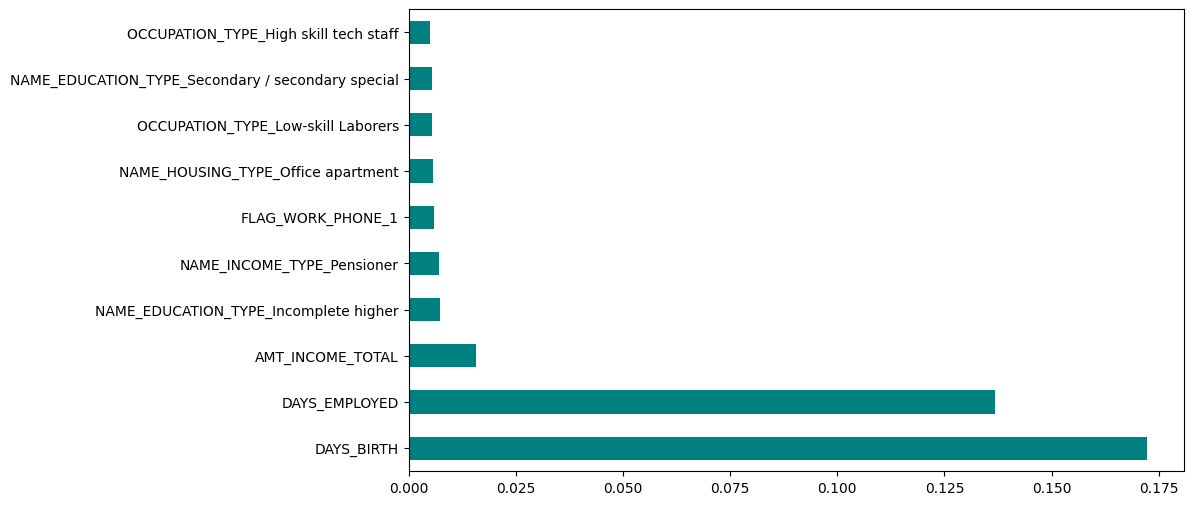

In [30]:
# top 10
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X_train, y_train)
feat_importances = pd.Series(importances, X_train.columns)

# Select the top 10 features
top_10_feats = feat_importances.nlargest(10)


plt.figure(figsize=(10, 6))
top_10_feats.plot(kind='barh', color='teal')
plt.show()

In [31]:
top_10_feature_names = top_10_feats.index
X_train_top_10 = X_train[top_10_feature_names]
X_test_top_10 = X_test[top_10_feature_names]

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Import the necessary libraries if you haven't already.

# 2. Create an instance of the RFC.
rfc = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed.

# 3. Fit the RFC to your training data.
rfc.fit(X_train_top_10, y_train)

# 4. Make predictions on your test data.
y_pred = rfc.predict(X_test_top_10)

# 5. Generate a classification report.
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         Bad       0.56      0.58      0.57      3275
        Good       0.55      0.60      0.58      3288
     Neutral       0.44      0.14      0.21       649

    accuracy                           0.55      7212
   macro avg       0.52      0.44      0.45      7212
weighted avg       0.55      0.55      0.54      7212



Bonus, Using [FLAML (automl)](https://github.com/microsoft/FLAML)

In [39]:
X_train = data_list[0]
y_train = data_list[1]
X_test = data_list[2]
y_test = data_list[3]

Guys, here is how you install flaml (ensure to run all the 3 commands)  
pip install flaml  
pip install flaml[notebook]  
pip install flaml[automl]

In [34]:
from flaml import AutoML
automl = AutoML()
automl.fit(X_train, y_train, task="classification",time_budget=60)

[flaml.automl.logger: 10-28 13:32:08] {1679} INFO - task = classification
[flaml.automl.logger: 10-28 13:32:08] {1690} INFO - Evaluation method: holdout
[flaml.automl.logger: 10-28 13:32:08] {1788} INFO - Minimizing error metric: log_loss
[flaml.automl.logger: 10-28 13:32:08] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 10-28 13:32:08] {2218} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 10-28 13:32:08] {2344} INFO - Estimated sufficient time budget=863s. Estimated necessary time budget=20s.
[flaml.automl.logger: 10-28 13:32:08] {2391} INFO -  at 0.5s,	estimator lgbm's best error=0.9352,	best estimator lgbm's best error=0.9352
[flaml.automl.logger: 10-28 13:32:08] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 10-28 13:32:08] {2391} INFO -  at 0.6s,	estimator lgbm's best error=0.9352,	best estimator lgbm's best error=0.9352
[flaml.automl.logger: 10-28 13:3

C:\Users\Manish Seal\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 10-28 13:33:14] {2627} INFO - retrain lgbm for 4.0s
[flaml.automl.logger: 10-28 13:33:14] {2630} INFO - retrained model: LGBMClassifier(colsample_bytree=0.6782006405163307,
               learning_rate=0.08222714104485478, max_bin=511,
               min_child_samples=3, n_estimators=1, n_jobs=-1, num_leaves=350,
               reg_alpha=0.003934614746573571, reg_lambda=0.003560646472734122,
               verbose=-1)
[flaml.automl.logger: 10-28 13:33:14] {1930} INFO - fit succeeded
[flaml.automl.logger: 10-28 13:33:14] {1931} INFO - Time taken to find the best model: 36.88169622421265


Apparently LGBM is the best fit for this

In [35]:
print(automl.best_estimator)
print(automl.best_config)

lgbm
{'n_estimators': 58, 'num_leaves': 350, 'min_child_samples': 3, 'learning_rate': 0.08222714104485478, 'log_max_bin': 9, 'colsample_bytree': 0.6782006405163307, 'reg_alpha': 0.003934614746573571, 'reg_lambda': 0.003560646472734122}


In [40]:
y_pred = automl.predict(X_test)

# get classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         Bad       0.57      0.58      0.58      3275
        Good       0.56      0.64      0.60      3288
     Neutral       0.62      0.11      0.19       649

    accuracy                           0.57      7212
   macro avg       0.58      0.44      0.45      7212
weighted avg       0.57      0.57      0.55      7212



array(['Good', 'Good', 'Good', ..., 'Bad', 'Bad', 'Bad'], dtype=object)